In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.zeros([42,42])
G = np.matrix(a)

In [3]:
G[0,8] = 1
for i in np.arange(1,8,1):
    G[i, i-1] = 1
    G[i, i+8] = 1
G[4,12] = 0

for i in np.arange(8,15,1):
    G[i, i-8] = 1
    G[i, i+1] = 1
G[15,7] = G[15, 24] = 1

for i in [19,20,22,23]:
    G[i, i-1] = 1
    G[i, i+1] = 1
    G[i, i+9] = 1
    G[i, i-9] = 1
G[16,8] = G[16,17] = 1
for i in [16,18,9,26]:
    G[17, i] = 1
for i in [17, 19, 27]:
    G[18, i] = 1
for i in [20, 22, 12]:
    G[21, i] = 1
for i in [23, 15, 33]:
    G[24, i] = 1

G[25, 16] = G[25, 34] = 1
for i in np.arange(26, 34, 1):
    G[i, i-1] = 1
    G[i, i-9] = 1
G[26, 35] = 1
for i in [28, 29, 31, 32, 33]:
    G[i, i+8] = 1

G[34, 25] = G[34, 35] = 1
G[35, 26] = G[35, 36] = 1
for i in np.arange(36, 41, 1):
    G[i, i-8] = 1
    G[i, i+1] = 1
G[41, 33] = 1

In [4]:
X = []
for i in range(42):
    for j in range(42):
        if G[i,j] == 1:
            X.append([i,j])
            
# In my initial construction, I missed some one-way streets, corrections are made below:

correct_edges_to_add = [[11,20], [9,17], [8,16], [16,25], [13,22], [14,23]]
edges_to_remove = [[11,3], [20,11], [29,20], [37,29], [2,10], [19,28], [28,36], [9,1], [17,9], [26,17], [35,26]]

In [5]:
# Generate graph of Street system
Graph = nx.DiGraph()
Graph.add_nodes_from(range(0,42))
Graph.add_edges_from(X)
Graph.add_edges_from(correct_edges_to_add)
Graph.remove_edges_from(edges_to_remove)

# generate underlying undirected graph for comparison
Graph2 = nx.Graph()
Graph2.add_edges_from(X)

# print information on directed graph
print('Directed Graph:\n', nx.info(Graph))
Degree = nx.degree(Graph)
In_degree = Graph.in_degree
Out_degree = Graph.out_degree
Euler = nx.is_eulerian(Graph)
print(Euler)
print('')

# print information on underlying undorected graph
print('Undirected Graph:\n', nx.info(Graph2))
Degree = nx.degree(Graph2)
Euler = nx.is_eulerian(Graph2)
print(Euler)

Directed Graph:
 Name: 
Type: DiGraph
Number of nodes: 42
Number of edges: 95
Average in degree:   2.2619
Average out degree:   2.2619
False

Undirected Graph:
 Name: 
Type: Graph
Number of nodes: 42
Number of edges: 70
Average degree:   3.3333
False


Plot of Street System of Berkeley's North Side:


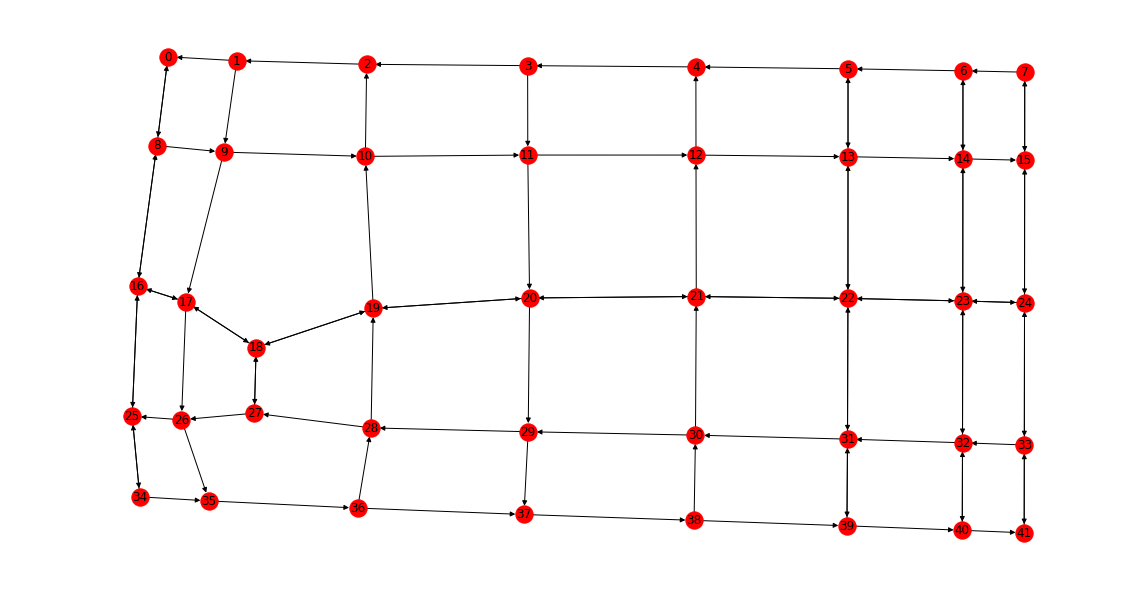

In [6]:
positions = nx.spectral_layout(Graph2)

print("Plot of Street System of Berkeley's North Side:")
plt.figure(figsize=[15,8])
nx.draw(Graph,with_labels=True, pos=positions)
plt.gca().invert_yaxis()
plt.draw()

In [7]:
in_degree = Graph.in_degree()
out_degree = Graph.out_degree()
nodes = []
for i in range(42):
    if in_degree[i] != out_degree[i]:
        nodes.append(i)

In [8]:
length_graph = dict(nx.all_pairs_shortest_path_length(Graph))
length_graph2 = dict(nx.all_pairs_shortest_path_length(Graph2))

In [9]:
differences_total = np.zeros(12)
count = np.zeros(12)
for i in range(42):
    for j in range(42):
        A = length_graph[i][j]
        B = length_graph2[i][j]
        differences_total[B] += A-B
        count[B] += 1
average_difference = np.zeros(12)
for i in range(12):
    average_difference[i] = differences_total[i] / count[i]

In [10]:
differences_all = []
for i in range(12):
    differences_all.append([])
differences_max = []
for i in range(12):
    differences_max.append([])
differences_mean = []
for i in range(12):
    differences_mean.append([])
differences_std = []
for i in range(12):
    differences_std.append([])

for i in range(42):
    for j in range(42):
        A = length_graph[i][j]
        B = length_graph2[i][j]
        differences_all[B].append( [A-B] )
        

for i in range(12):
    differences_mean[i] = np.mean(differences_all[i])
for i in range(12):
    differences_std[i] = np.std(differences_all[i])

zeros = 0
for i in range(12):
    for j in range(len(differences_all[i])):
        if differences_all[i][j][0] == 0:
            zeros += 1
print(zeros)

1265


In [11]:
differences_new = []
for i in range(12):
    differences_new.append([])
for i in range(36):
    for j in range(42):
        A = length_graph[i][j]
        B = length_graph2[i][j]
        differences_new[B].append( [A-B] )
for i in range(12):
    differences_max[i] = max(differences_new[i])

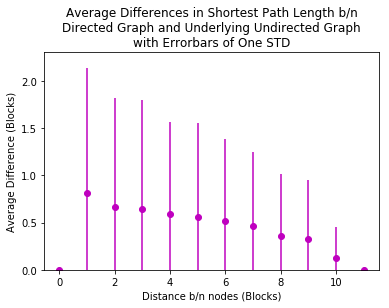

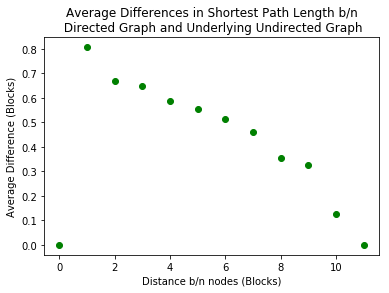

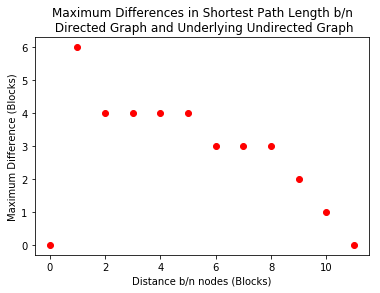

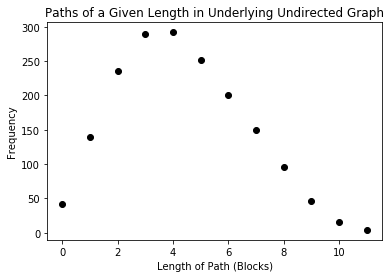

In [12]:
plt.figure(0)
plt.errorbar(range(12), average_difference, yerr = differences_std, fmt='mo')
plt.title('Average Differences in Shortest Path Length b/n\nDirected Graph and Underlying Undirected Graph\nwith Errorbars of One STD')
plt.xlabel('Distance b/n nodes (Blocks)')
plt.ylabel('Average Difference (Blocks)')
plt.ylim([0,2.3])
plt.show()

plt.figure(1)
plt.plot(range(12), differences_mean, 'go')
plt.title('Average Differences in Shortest Path Length b/n\n Directed Graph and Underlying Undirected Graph')
plt.xlabel('Distance b/n nodes (Blocks)')
plt.ylabel('Average Difference (Blocks)')
plt.show()

plt.figure(1)
plt.plot(range(12), differences_max, 'ro')
plt.title('Maximum Differences in Shortest Path Length b/n\n Directed Graph and Underlying Undirected Graph')
plt.xlabel('Distance b/n nodes (Blocks)')
plt.ylabel('Maximum Difference (Blocks)')
plt.show()

plt.figure(3)
plt.plot(range(12), count, 'ko')
plt.title('Paths of a Given Length in Underlying Undirected Graph')
plt.xlabel('Length of Path (Blocks)')
plt.ylabel('Frequency')
plt.show()

In [16]:
Connected = nx.is_strongly_connected(Graph)
Edge_connect1 = []
Node_connect1 = []
for i in range(42):
    for j in range(42):
        if i != j:
            edge = nx.edge_connectivity(Graph, i, j)
            node = nx.node_connectivity(Graph, i, j)
            Edge_connect1.append(edge)
            Node_connect1.append(node)
edge_connectivity1 = np.average(Edge_connect1)
node_connectivity1 = np.average(Node_connect1)

Edge_connect2 = []
Node_connect2 = []
significant_nodes = [1,2,3,4,5,6,9,10,11,12,13,14,17,18,19,20,21,22,23,26,27,28,29,30,31,32,35,36,37,38,39,40,41]
for i in significant_nodes:
    for j in range(42):
        if i != j:
            edge = nx.edge_connectivity(Graph2, i, j)
            node = nx.node_connectivity(Graph2, i, j)
            Edge_connect2.append(edge)
            Node_connect2.append(node)
edge_connectivity2 = np.average(Edge_connect2)
node_connectivity2 = np.average(Node_connect2)

print('Is strongly connected?:', Connected)
print('Edge Connectivity Directed = {0:0.4}'.format(edge_connectivity1))
print('Edge Connectivity Undirected = {0:0.4}'.format(edge_connectivity2))
print('')
print('Node Connectivity Directed = {0:0.4}'.format(node_connectivity1))
print('Node Connectivity Undirected = {0:0.4}'.format(node_connectivity2))

Is strongly connected?: True
Edge Connectivity Directed = 1.826
Edge Connectivity Undirected = 3.101

Node Connectivity Directed = 1.826
Node Connectivity Undirected = 3.101
